<a href="https://colab.research.google.com/github/archietech-ai/tokenizer/blob/main/Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🧠 **Understanding Embeddings with BERT**

In this notebook, we go into the world of embeddings, utilizing the BERT model to understand the semantic relationships between words in different contexts.

## 🛠️ Setup and Installation

Start by installing the necessary libraries to ensure all functionalities are available.

In [ ]:
!pip install transformers
!pip install scipy

## 📚 Importing Libraries

Import essential modules for our tasks.

In [ ]:
from transformers import BertModel, AutoTokenizer
from scipy.spatial.distance import cosine

## 🤖 Model Setup

Load the pre-trained BERT model and tokenizer. This model will help us extract embeddings for our analysis.

In [ ]:
# Defining the model name
model_name = "bert-base-cased"

# Loading the pre-trained model and tokenizer
model = BertModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]


## 📝 Function Definition: Predict

Define a function that encodes input text into tensors, which are then fed to the model to obtain embeddings.

In [ ]:
# Defining a function to encode the input text and get model predictions
def predict(sentence):
    encoded_inputs = tokenizer(sentence, return_tensors="pt")  # Tokenizes the input text (sentence) and converts it into tensors ready to be used by a model.
    return encoded_inputs  # This is just a simple tokenization.
    #return model(**encoded_inputs)[0]

In [ ]:
sentence1 = "There was a fly drinking from my soup"
predict (sentence1)

{'input_ids': tensor([[  101,  1247,  1108,   170,  4689,  5464,  1121,  1139, 13128,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
def model_predict(text):
    encoded_inputs = tokenizer(text, return_tensors="pt")
    #return encoded_inputs
    return model(**encoded_inputs)[0] # The model returns the embedding

In [ ]:
sentence1 = "There was a fly drinking from my soup"
output=model_predict (sentence1)
output

tensor([[[ 0.5312,  0.2162,  0.0967,  ..., -0.2778,  0.2341, -0.2684],
         [ 0.1996, -0.2155, -0.1150,  ...,  0.1952,  0.5705,  0.0951],
         [ 0.2500, -0.0971,  0.5910,  ...,  0.1830, -0.0093,  0.0130],
         ...,
         [-0.1890, -0.1836,  0.0684,  ..., -0.1357,  0.2555,  0.3643],
         [ 0.2328,  0.0131,  0.2131,  ..., -0.2474, -0.2384,  0.0111],
         [ 1.3495,  0.1425,  0.1270,  ..., -0.5699,  0.5849, -0.7200]]],
       grad_fn=<NativeLayerNormBackward0>)

In [ ]:
length_of_list = output.size(1)
print(length_of_list)  # We have 10 tokens and each token has an embedding. Here we get the number of embeddings, one per token

10


In [ ]:
length_of_list = output.size(2)
print(length_of_list) # We have 768 numbers per token

768


## 📃 Defining the Sentences

Set up sentences to analyze. The

In [ ]:
# Defining the sentences
sentence1 = "There was a fly drinking from my soup"
sentence2 = "There is a fly swimming in my juice"
# sentence2 = "To become a commercial pilot, he had to fly for 1500 hours." # second fly example

# Tokenizing the sentences
tokens1 = tokenizer.tokenize(sentence1) # This is a lower-level API that only tokenizes the input text into individual subword tokens (not IDs).
tokens2 = tokenizer.tokenize(sentence2)

In [ ]:
tokens1

['There', 'was', 'a', 'fly', 'drinking', 'from', 'my', 'soup']

In [ ]:
tokens2

['There', 'is', 'a', 'fly', 'swimming', 'in', 'my', 'juice']

## 🔍 Tokenization and Model Predictions

Tokenize the sentences and obtain predictions (embeddings) from the model.

In [ ]:
# Getting model predictions for the sentences
out1 = model_predict(sentence1) # out1 is a 3D tensor with shape (1, sequence_length, hidden_size)--> 1: Batch size (single sentence in the batch). sequence_length: Number of tokens in the sequence. hidden_size: Dimensionality of the hidden state (e.g., 768).
out2 = model_predict(sentence2)

In [ ]:
out1

tensor([[[ 0.5312,  0.2162,  0.0967,  ..., -0.2778,  0.2341, -0.2684],
         [ 0.1996, -0.2155, -0.1150,  ...,  0.1952,  0.5705,  0.0951],
         [ 0.2500, -0.0971,  0.5910,  ...,  0.1830, -0.0093,  0.0130],
         ...,
         [-0.1890, -0.1836,  0.0684,  ..., -0.1357,  0.2555,  0.3643],
         [ 0.2328,  0.0131,  0.2131,  ..., -0.2474, -0.2384,  0.0111],
         [ 1.3495,  0.1425,  0.1270,  ..., -0.5699,  0.5849, -0.7200]]],
       grad_fn=<NativeLayerNormBackward0>)

## 🔄 Extracting Embeddings

Extract embeddings specifically for the word "fly" from both sentences.

In [ ]:
# Extracting embeddings for the word 'fly' in both sentences
emb1 = out1[0:, tokens1.index("fly"), :].detach()[0]  # 0:: Selects the first batch (index 0). tokens1.index("fly"): Selects the position of "fly" in the sequence. : Selects all dimensions of the hidden size.
# So the output of the above command is a tensor of shape (1, hidden_size). .detach(): --> Removes the tensor from the computation graph, making it a non-trainable tensor. [0]: Removes the batch dimension, resulting in a 1D tensor of size hidden_size.

emb2 = out2[0:, tokens2.index("fly"), :].detach()[0]



In [ ]:
emb1

tensor([ 1.3092e-01, -1.0668e-01,  9.2523e-02,  1.3643e-01, -2.0440e-02,
        -4.5883e-01,  2.8128e-01,  6.1601e-02, -3.5428e-01, -2.1475e-01,
        -2.5499e-01,  5.1753e-01, -4.3148e-01, -6.3329e-02, -5.3246e-01,
        -3.2249e-01, -2.1388e-01,  1.3354e-01, -1.9712e-01, -2.6240e-01,
        -1.4709e-01, -1.0367e-01, -2.5171e-01,  5.1877e-01,  9.3922e-02,
        -5.8071e-02, -2.8924e-01,  3.1419e-01, -1.9856e-02,  8.9696e-02,
        -4.5797e-01, -7.0561e-02,  5.0785e-01,  3.4331e-02, -1.3408e-01,
         1.4696e-01,  2.7969e-01,  3.0272e-02,  1.2643e-01, -4.4700e-01,
         2.9013e-01,  4.3903e-02, -2.0638e-01, -1.5396e-01,  2.4499e-01,
        -6.9515e-01,  4.1689e-01, -6.1322e-02, -3.0181e-01, -1.1547e-01,
        -3.1198e-01, -1.6191e-01, -1.8917e-01,  1.5833e-01,  1.3774e-01,
        -3.2496e-01,  2.6430e-01, -1.0327e-01,  2.0264e-01,  6.1191e-01,
        -6.3990e-02,  5.9297e-01,  4.8044e-01,  1.2240e-01, -3.5768e-02,
         2.2697e-01, -2.0584e-01, -2.9186e-01,  4.5

In [ ]:
emb1 = out1[0:, 3, :].detach()
emb1
# emb2 = out2[0:, 3, :].detach()

tensor([[ 1.3092e-01, -1.0668e-01,  9.2523e-02,  1.3643e-01, -2.0440e-02,
         -4.5883e-01,  2.8128e-01,  6.1601e-02, -3.5428e-01, -2.1475e-01,
         -2.5499e-01,  5.1753e-01, -4.3148e-01, -6.3329e-02, -5.3246e-01,
         -3.2249e-01, -2.1388e-01,  1.3354e-01, -1.9712e-01, -2.6240e-01,
         -1.4709e-01, -1.0367e-01, -2.5171e-01,  5.1877e-01,  9.3922e-02,
         -5.8071e-02, -2.8924e-01,  3.1419e-01, -1.9856e-02,  8.9696e-02,
         -4.5797e-01, -7.0561e-02,  5.0785e-01,  3.4331e-02, -1.3408e-01,
          1.4696e-01,  2.7969e-01,  3.0272e-02,  1.2643e-01, -4.4700e-01,
          2.9013e-01,  4.3903e-02, -2.0638e-01, -1.5396e-01,  2.4499e-01,
         -6.9515e-01,  4.1689e-01, -6.1322e-02, -3.0181e-01, -1.1547e-01,
         -3.1198e-01, -1.6191e-01, -1.8917e-01,  1.5833e-01,  1.3774e-01,
         -3.2496e-01,  2.6430e-01, -1.0327e-01,  2.0264e-01,  6.1191e-01,
         -6.3990e-02,  5.9297e-01,  4.8044e-01,  1.2240e-01, -3.5768e-02,
          2.2697e-01, -2.0584e-01, -2.

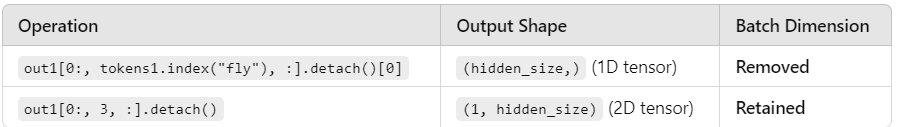

## 📊 Calculating Cosine Similarity

Calculate the cosine similarity between the embeddings of the word "fly" from both sentences to measure how context affects meaning.

In [ ]:
# Calculating the cosine similarity between the embeddings
cosine(emb1, emb2)

0.06798791885375977

## 🌟 Conclusion

This notebook has guided you through the process of extracting and comparing word embeddings using BERT. Such techniques are fundamental in understanding word semantics and their usage across different contexts.

Experiment by changing the sentences or focusing on different words to see how the embeddings and their similarities vary!